
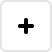
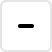
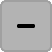
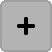
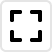
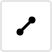
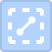
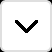
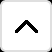
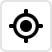

In [1]:
from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame


In [3]:
mpg = pd.read_csv ("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg.head(3)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [4]:
h = 420
def bunch(p):
    bunch = GGBunch()
    bunch.add_plot(p, 0, 0)
    bunch.add_plot(p + coord_flip(), 0, h)
    bunch.show()

In [5]:
box_plot = (ggplot(mpg) + theme(axis_title_x='blank') + 
            geom_boxplot(aes(as_discrete('class',order=1, order_by='..middle..'), 'hwy'),
                         color="#579673", fill="#9AC0B3", size=1.5
                        #tooltips=layer_tooltips().format('^Y', 'valus is\n {}')
                        ))
bunch(box_plot)

In [6]:
np.random.seed(123)
data = DataFrame(dict(
    cond=np.repeat(['A','B'], 200),
    rating=np.concatenate((np.random.normal(0, 1, 200), np.random.normal(.8, 1, 200)))
))

bunch(ggplot(data, aes(x='cond', y='rating', color='cond')) + geom_boxplot())


In [7]:
tdata = dict(
    supp = ['OJ', 'OJ', 'OJ', 'VC', 'VC', 'VC'],
    dose = [0.5, 1.0, 2.0, 0.5, 1.0, 2.0],
    length = [13.23, 22.70, 26.06, 7.98, 16.77, 26.14],
    len_min = [11.83, 21.2, 24.50, 4.24, 15.26, 23.35],
    len_max = [15.63, 24.9, 27.11, 10.72, 19.28, 28.93]
)

In [8]:
# geom_errorbar
errorbar = (ggplot(tdata, aes(x='dose', color='supp')) 
  + geom_errorbar(aes(ymin='len_min', ymax='len_max'), width=.1) 
  + geom_line(aes(y='length')) 
  + geom_point(aes(y='length'))
)
bunch(errorbar)

In [9]:
(ggplot(tdata, aes(x='dose', color='supp'))
 + geom_errorbar(aes(ymin='len_min', ymax='len_max', group='supp'), color='black', width=.1, position= position_dodge(0.1))
 + geom_line(aes(y='length'), position= position_dodge(0.1))
 + geom_point(aes(y='length'), position= position_dodge(0.1), size=5)
 + coord_flip()
)

In [10]:
pointrange = ggplot(tdata, aes(x='dose', color='supp'))  \
+ xlab("Dose (mg)") \
+ ylab("Tooth length (mm)") \
+ scale_color_manual(['orange', 'dark_green'], na_value='gray') \
+ geom_pointrange(aes(y='length', ymin='len_min', ymax='len_max', color='supp'), position=position_dodge(0.1)) \
+ geom_line(aes(y='length'), position=position_dodge(0.1))

bunch(pointrange)

In [11]:
crossbar = ( 
    ggplot(tdata, aes(x='dose', color='supp')) 
+ xlab("Dose (mg)") 
+ ylab("Tooth length (mm)") 
+ scale_color_manual(['orange', 'dark_green'], na_value='gray') 
+ geom_crossbar(aes(ymin='len_min', ymax='len_max', middle='length', color='supp'), fatten=5)
)
bunch(crossbar)